In [6]:
import pandas as pd

df = pd.read_csv('datasets/student_dropout.csv')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
df['Target'] = df['Target'].map({
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

C:\Users\aa964\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


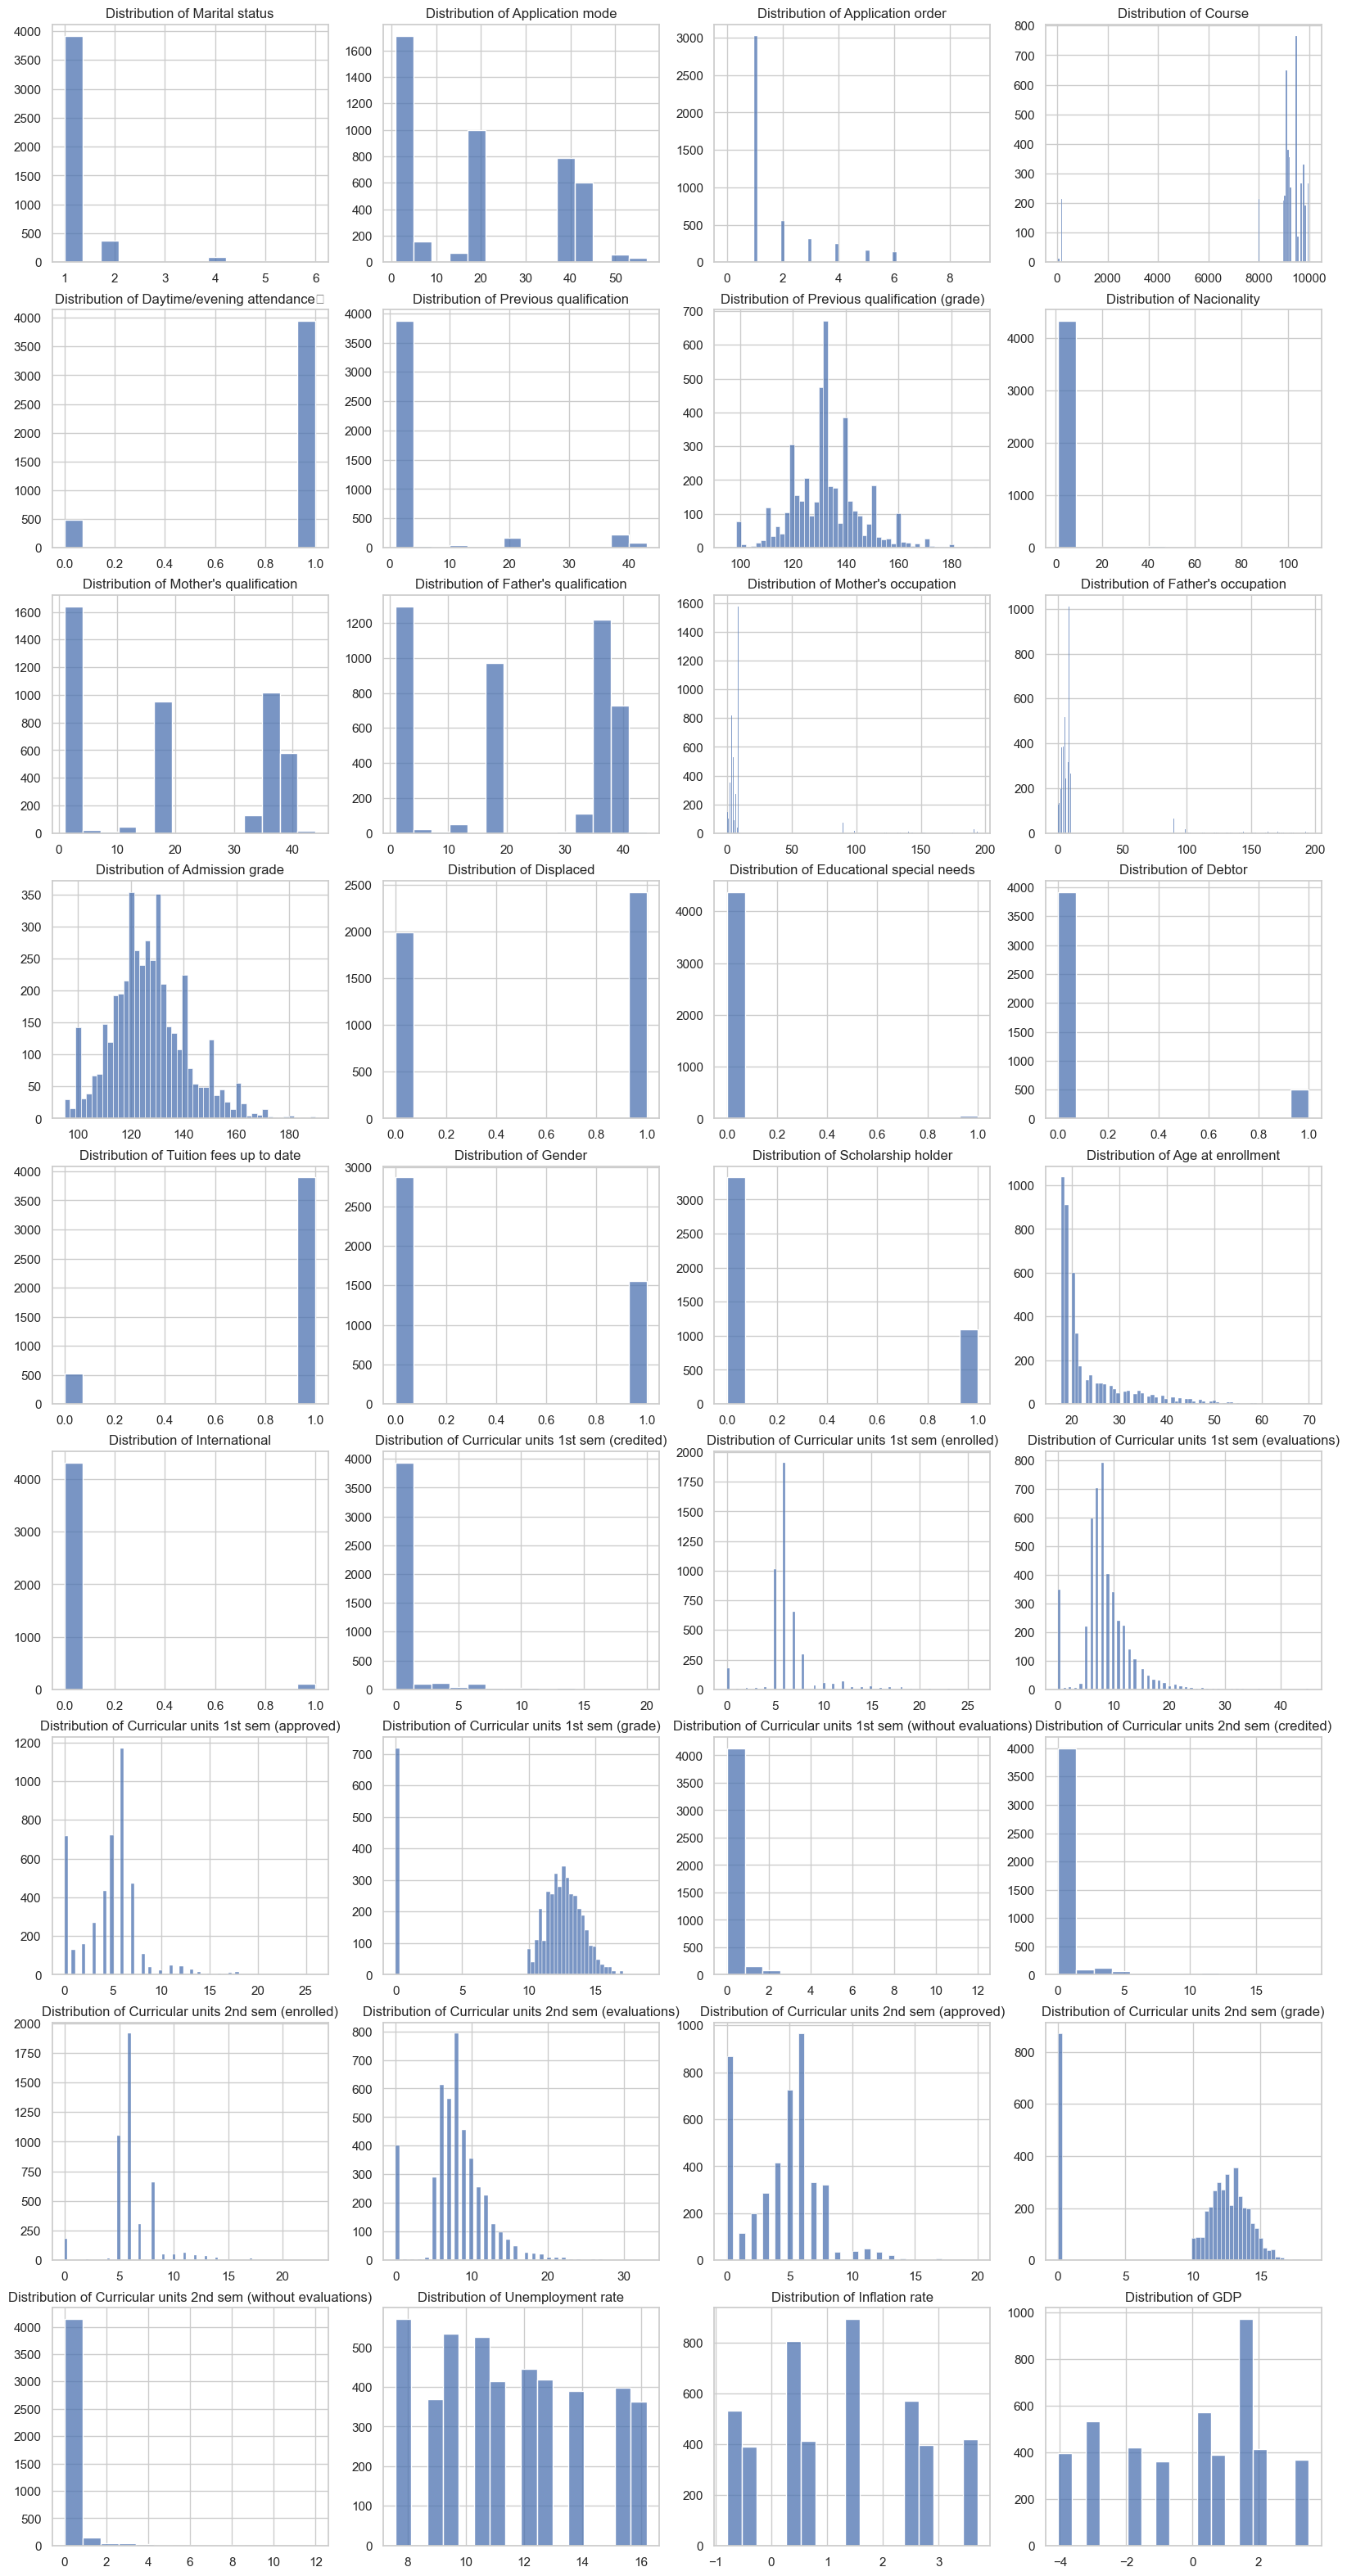

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a distribution plot for each numerical feature
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if col == 'Target':
        continue
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.show()

C:\Users\aa964\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\aa964\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


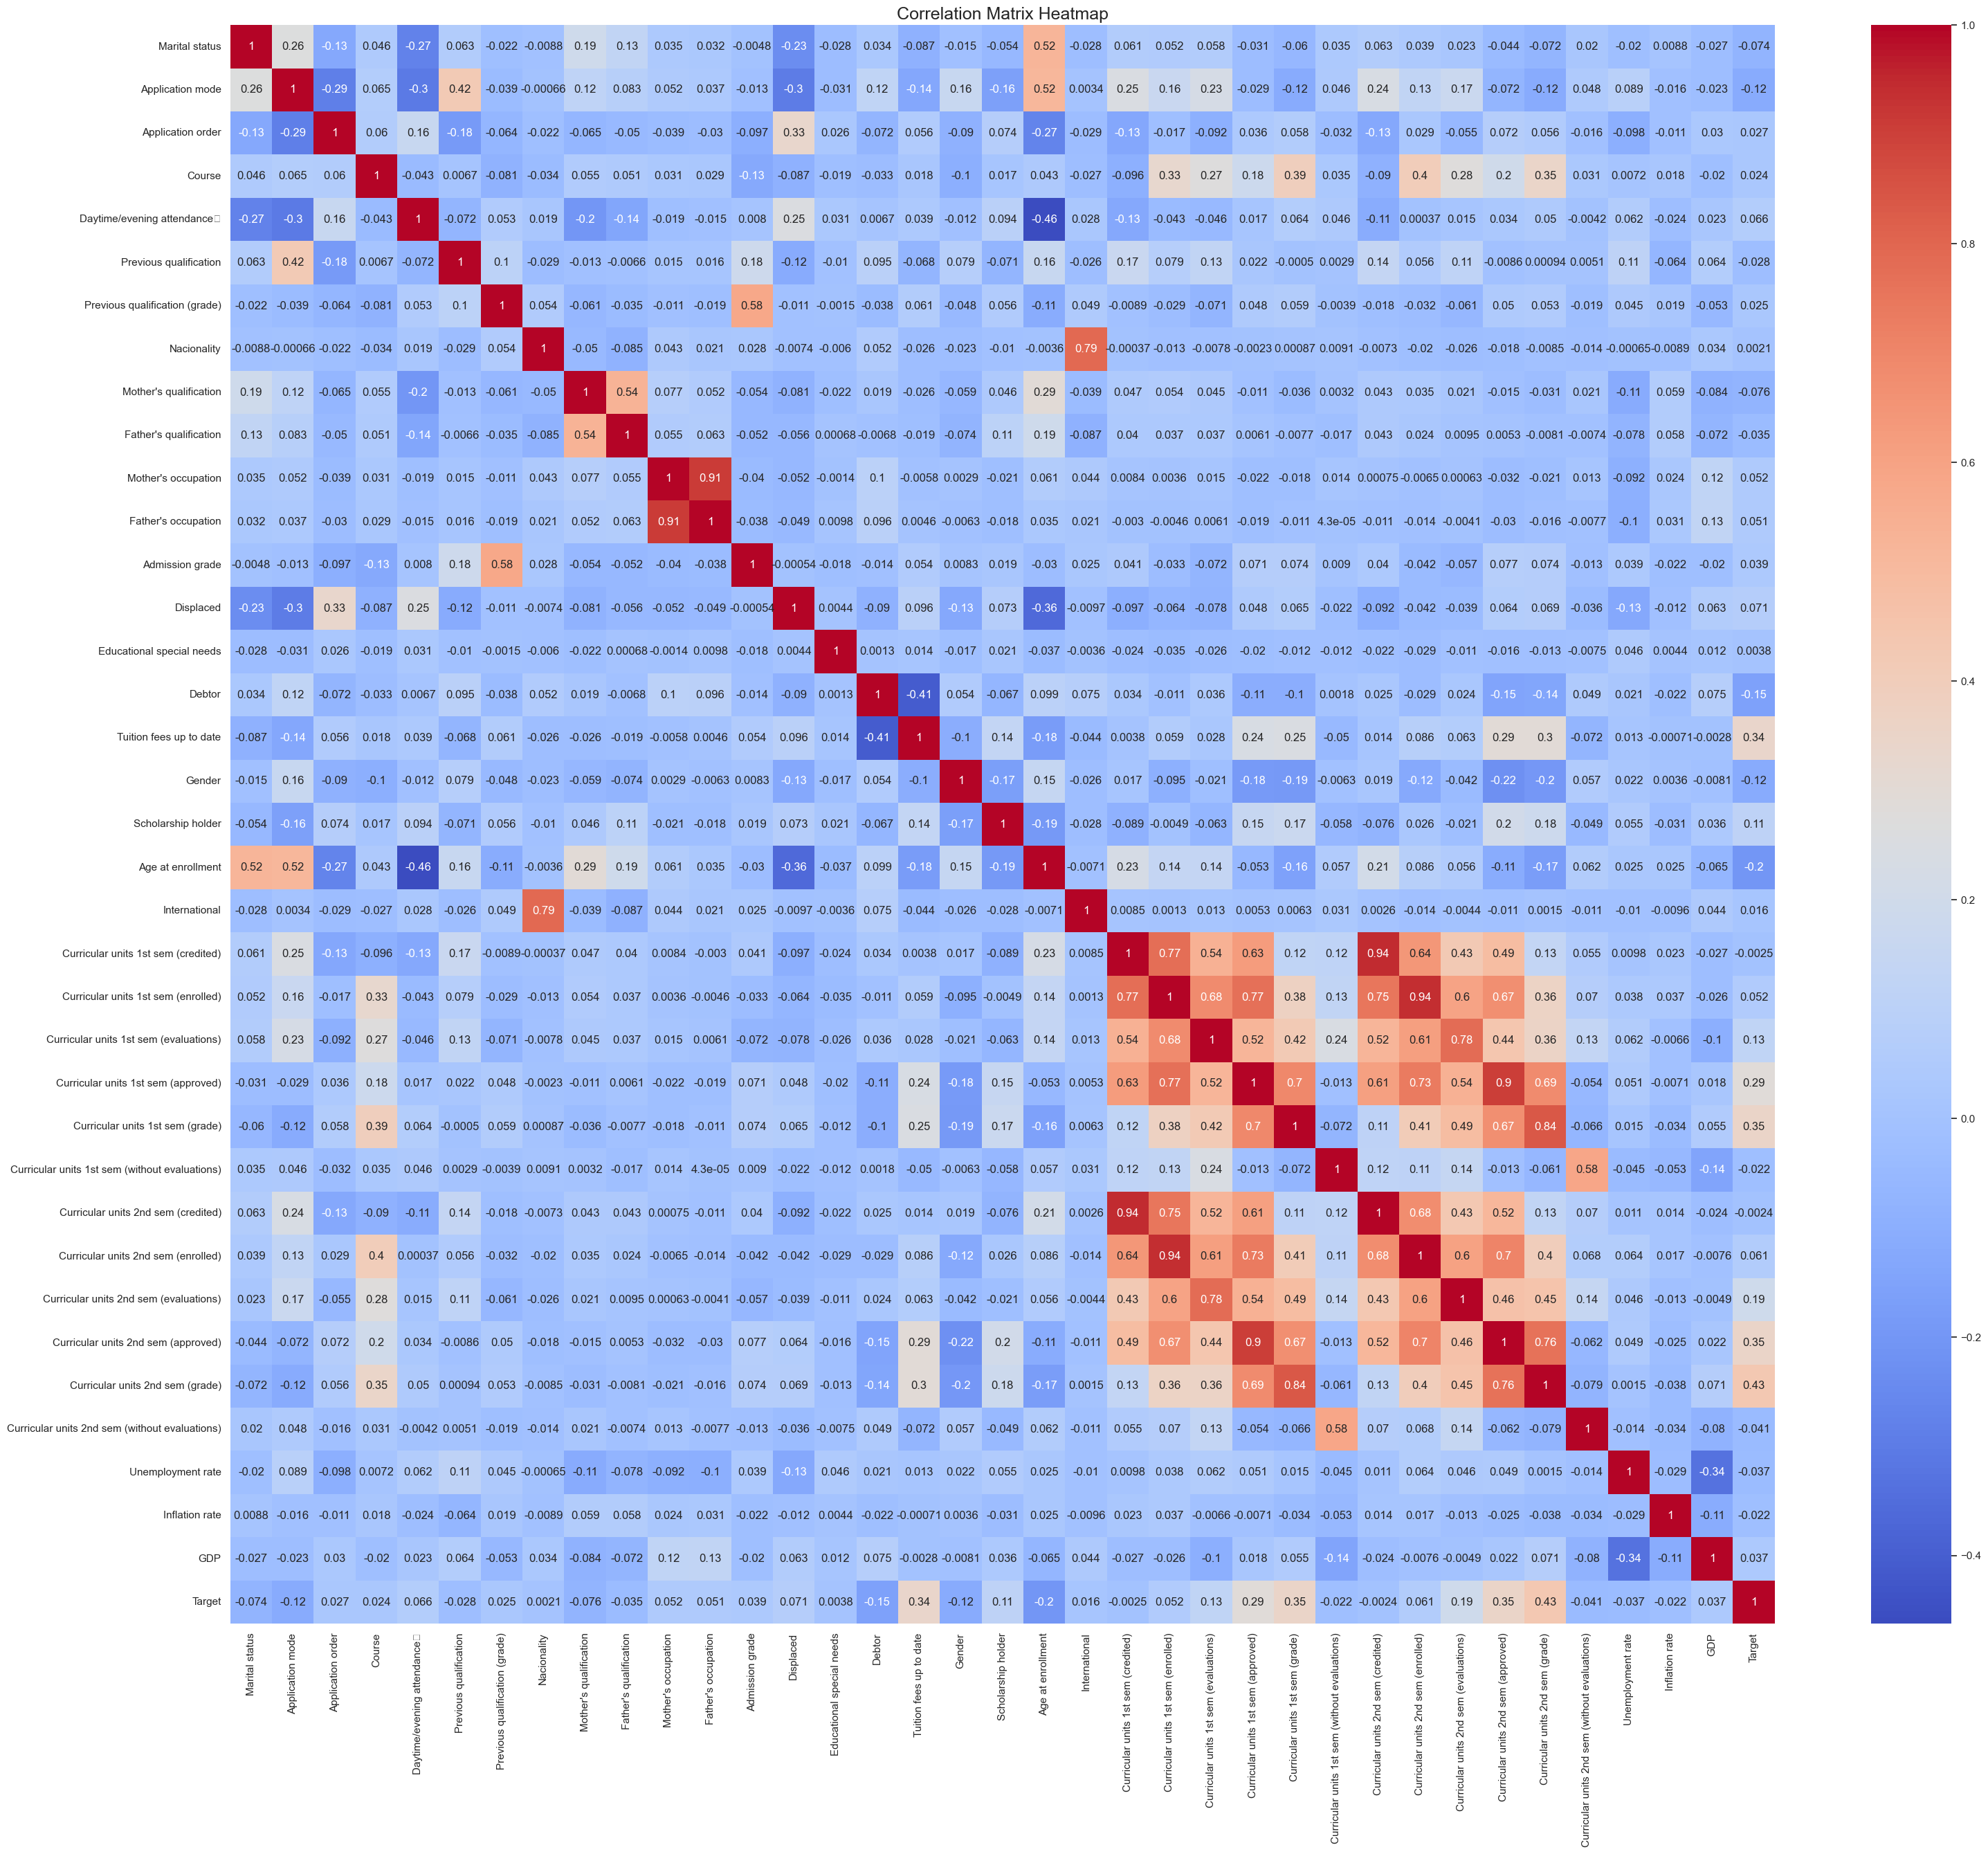

In [14]:
correlation = df.corr()

plt.figure(figsize=(36, 30))

sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

In [15]:
target_corr = correlation['Target']

high_corr = target_corr[target_corr.abs() > 0.1]

high_corr

Application mode                         -0.116928
Debtor                                   -0.154802
Tuition fees up to date                   0.342121
Gender                                   -0.118454
Scholarship holder                        0.114517
Age at enrollment                        -0.201806
Curricular units 1st sem (evaluations)    0.125278
Curricular units 1st sem (approved)       0.290243
Curricular units 1st sem (grade)          0.349652
Curricular units 2nd sem (evaluations)    0.194412
Curricular units 2nd sem (approved)       0.351135
Curricular units 2nd sem (grade)          0.429214
Target                                    1.000000
Name: Target, dtype: float64

In [18]:
df_filtered = df[high_corr.index]

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4424 non-null   int64  
 1   Debtor                                  4424 non-null   int64  
 2   Tuition fees up to date                 4424 non-null   int64  
 3   Gender                                  4424 non-null   int64  
 4   Scholarship holder                      4424 non-null   int64  
 5   Age at enrollment                       4424 non-null   int64  
 6   Curricular units 1st sem (evaluations)  4424 non-null   int64  
 7   Curricular units 1st sem (approved)     4424 non-null   int64  
 8   Curricular units 1st sem (grade)        4424 non-null   float64
 9   Curricular units 2nd sem (evaluations)  4424 non-null   int64  
 10  Curricular units 2nd sem (approved)     4424 non-null   int6

In [19]:
df_filtered.isnull().sum()

Application mode                          0
Debtor                                    0
Tuition fees up to date                   0
Gender                                    0
Scholarship holder                        0
Age at enrollment                         0
Curricular units 1st sem (evaluations)    0
Curricular units 1st sem (approved)       0
Curricular units 1st sem (grade)          0
Curricular units 2nd sem (evaluations)    0
Curricular units 2nd sem (approved)       0
Curricular units 2nd sem (grade)          0
Target                                    0
dtype: int64

In [20]:
df_filtered.duplicated().sum()

147

In [21]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.duplicated().sum()

0

In [22]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4277 non-null   int64  
 1   Debtor                                  4277 non-null   int64  
 2   Tuition fees up to date                 4277 non-null   int64  
 3   Gender                                  4277 non-null   int64  
 4   Scholarship holder                      4277 non-null   int64  
 5   Age at enrollment                       4277 non-null   int64  
 6   Curricular units 1st sem (evaluations)  4277 non-null   int64  
 7   Curricular units 1st sem (approved)     4277 non-null   int64  
 8   Curricular units 1st sem (grade)        4277 non-null   float64
 9   Curricular units 2nd sem (evaluations)  4277 non-null   int64  
 10  Curricular units 2nd sem (approved)     4277 non-null   int64  
 

In [23]:
X = df_filtered.drop(['Target'], axis=1)
Y = df_filtered.Target

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43) 

print('Train size:', len(x_train))
print('Test size:', len(x_test))

Train size: 3421
Test size: 856


In [24]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()    
x_train = scaler.fit_transform(x_train)    
x_test = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()  
lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
lr_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(lr_pred, y_test)
print('Logistic Regression Score:', lr_accuracy)

Logistic Regression Score: 0.7523364485981309


In [28]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')  
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(svc_pred, y_test)
print('SVC Score:', svc_accuracy)

SVC Score: 0.7441588785046729


In [34]:
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier(criterion='entropy')  
dtc.fit(x_train, y_train) 

dtc_pred = dtc.predict(x_test)

dtc_accuracy = accuracy_score(dtc_pred, y_test)
print('Decision Tree Score:', dtc_accuracy)

Decision Tree Score: 0.6600467289719626


In [45]:
from sklearn.ensemble import RandomForestClassifier  

rf = RandomForestClassifier(n_estimators=300)  
rf.fit(x_train, y_train) 

rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
print('Random Forest Score:', rf_accuracy)

Random Forest Score: 0.741822429906542


In [54]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(n_neighbors=15)  
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(knn_pred, y_test)
print('KNN Score:', knn_accuracy)

KNN Score: 0.7394859813084113


In [55]:
X = df.drop(['Target'], axis=1)
Y = df.Target

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43) 

print('Train size:', len(x_train))
print('Test size:', len(x_test))

Train size: 3539
Test size: 885


In [56]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()  
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(lr_pred, y_test)
print('Logistic Regression Score:', lr_accuracy)

Logistic Regression Score: 0.6779661016949152


C:\Users\aa964\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')  
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(svc_pred, y_test)
print('SVC Score:', svc_accuracy)

SVC Score: 0.7638418079096045


In [58]:
from sklearn.tree import DecisionTreeClassifier  

dtc = DecisionTreeClassifier(criterion='entropy')  
dtc.fit(x_train, y_train) 

dtc_pred = dtc.predict(x_test)

dtc_accuracy = accuracy_score(dtc_pred, y_test)
print('Decision Tree Score:', dtc_accuracy)

Decision Tree Score: 0.6971751412429379


In [60]:
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(n_neighbors=15)  
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(knn_pred, y_test)
print('KNN Score:', knn_accuracy)

KNN Score: 0.6090395480225989


In [69]:
from sklearn.ensemble import RandomForestClassifier  

rf = RandomForestClassifier(n_estimators=100)  
rf.fit(x_train, y_train) 

rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
print('Random Forest Score:', rf_accuracy)

Random Forest Score: 0.7638418079096045


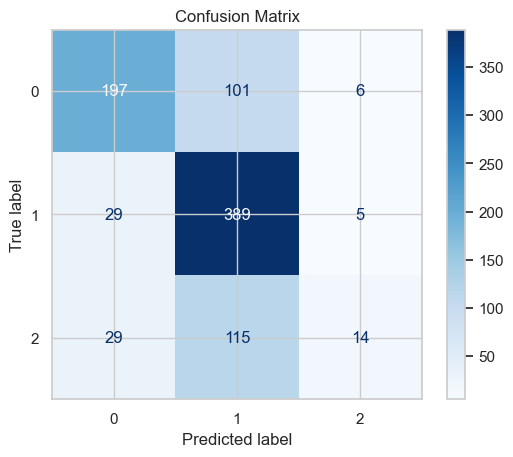

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

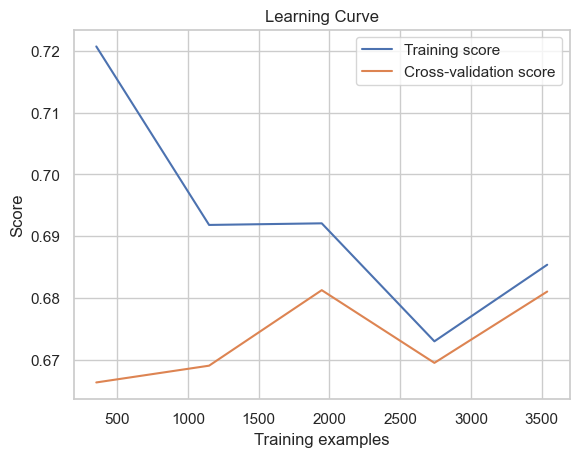

In [72]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr, X, Y, n_jobs=-1)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
